In [6]:
import numpy as np  
import matplotlib.pyplot as plt

n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))
print(Q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [2]:
learning_rate = 0.8
discount_factor = 0.95
exploration_rate = 0.2
epochs = 1000
print("Learning rate: ", learning_rate)
print("Discount factor: ", discount_factor)
print("Exploration rate: ", exploration_rate)
print("Epochs: ", epochs)  

Learning rate:  0.8
Discount factor:  0.95
Exploration rate:  0.2
Epochs:  1000


In [11]:
def get_nextState(state, action):
    row, col = divmod(state, 4)  

    if action == 0 and col > 0:        
        col -= 1
    elif action == 1 and col < 3:      
        col += 1
    elif action == 2 and row > 0:     
        row -= 1
    elif action == 3 and row < 3:     
        row += 1

    return row * 4 + col

In [13]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while True: 
        if np.random.rand() < exploration_rate:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        next_state = get_nextState(current_state, action)

        reward = 1 if next_state == goal_state else 0

        Q_table[current_state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[current_state, action])

        if next_state == goal_state:
            break

        current_state = next_state
    print("Epoch: ", epoch, "Current State: ", current_state, "Action: ", action, "Reward: ", reward, "Next State: ", next_state)
    print("Q-Table: ", Q_table)

Epoch:  0 Current State:  14 Action:  1 Reward:  1 Next State:  15
Q-Table:  [[14.41896981 15.18565597 13.65707712 15.28385811]
 [13.34752778 15.57461545 15.14129474 16.04890113]
 [14.72157357 16.82304507 15.98737174 16.91983398]
 [15.7536273  16.82544731 16.78617108 17.8351479 ]
 [15.21846447 15.88703667 14.51088367 16.09266207]
 [15.18801415 16.91391781 15.24069168 16.77409   ]
 [16.0398887  17.83622205 16.07300618 17.80363888]
 [16.90760457 17.80672162 16.91818433 18.77683865]
 [15.96999144 16.94395977 15.23774769 16.55314844]
 [15.99474413 17.8379622  15.99330598 17.77351799]
 [16.93483225 18.70998929 16.88725798 18.77683938]
 [17.82479454 18.77450934 17.80739495 19.76509986]
 [16.72589374 17.83168893 15.979203   15.9647956 ]
 [16.73292843 18.77682107 16.86783599 17.74201474]
 [17.77912746 19.76509986 17.82405674 18.76423923]
 [18.68339006 15.4342169  18.7343367  19.7527367 ]]
Epoch:  1 Current State:  14 Action:  1 Reward:  1 Next State:  15
Q-Table:  [[14.41896981 15.18565597 13.

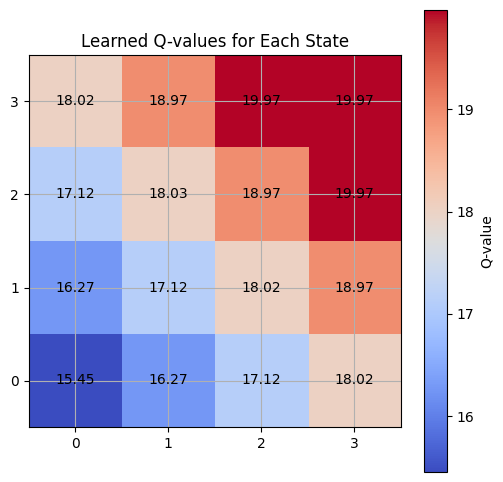

Learned Q-table:
[[14.67685579 15.45385998 14.66251085 15.44824895]
 [14.66433255 16.26722256 15.44523444 16.21539499]
 [15.45358507 17.1217306  16.26702711 17.12339217]
 [16.26509154 17.11392444 17.10269015 18.02461818]
 [15.45012674 16.25259706 14.67965654 16.2672221 ]
 [15.44509226 17.12339202 15.44865822 17.09828161]
 [16.26540159 18.02408462 16.26716154 18.02462333]
 [17.12275075 18.021446   17.1207172  18.97431292]
 [16.25560188 17.12378715 15.45372423 17.12199083]
 [16.2652874  18.02553803 16.26706041 18.02214166]
 [17.1236985  18.97435012 17.11867501 18.97328368]
 [18.02394916 18.97431156 18.02524927 19.97300646]
 [17.07401884 18.02462156 16.25413903 17.1049975 ]
 [17.12245677 18.97328771 17.12248828 18.02434445]
 [18.00803684 19.97188181 18.0199288  18.96879531]
 [18.89883343 19.69015531 18.96065602 19.97158583]]


In [14]:
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for Each State')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()
plt.grid(True)

for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Learned Q-table:")
print(Q_table)